# Simulation of Fund A doing +5% or -3% every year, versus Fund B doing +3% or -1% every year

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import time

In [26]:
def run_simu(start_cap, nb_experiment, wl, nb_years):
    """returns the list of ending capital for the random experiments"""
    results = []
    for e in range(nb_experiment):
        capital = start_cap
        for year in range(nb_years):
            random = np.random.randint(0,2)
            yearly_perf  = (1 + wl[random])
            capital = capital * yearly_perf
        results.append(capital)
    return results

In [71]:
# starting capital
start_cap = 100000
# number of experiments
nb_experiment = 1000

In [72]:
results1 = run_simu(start_cap=start_cap, nb_experiment=nb_experiment,\
                   wl=[0.05, -0.03] , nb_years=5)
results2 = run_simu(start_cap=start_cap, nb_experiment=nb_experiment,\
                   wl=[0.03, -0.01] , nb_years=5)

In [73]:
print('Mean for +5% -3% on 5 years: ' + str(np.mean(results1)))
print('Mean for +3% -1% on 5 years: ' + str(np.mean(results2)))

Mean for +5% -3% on 5 years: 105256.00292576
Mean for +3% -1% on 5 years: 105160.60449419999


## Distribution of end capital for the 2 funds, after 5 years

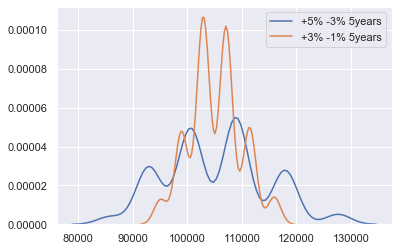

In [74]:
# Plot distribution over 5 year
sns.kdeplot(results1, label='+5% -3% 5years')
sns_plot_5y = sns.kdeplot(results2, label='+3% -1% 5years')
sns_plot_5y = sns_plot_5y.get_figure()
sns_plot_5y.savefig('5y.png')

In [75]:
# Re-run simulation but over 100 years this time
results3 = run_simu(start_cap=start_cap, nb_experiment=nb_experiment,\
                   wl=[0.05, -0.03] , nb_years=100)
results4 = run_simu(start_cap=start_cap, nb_experiment=nb_experiment,\
                   wl=[0.03, -0.01] , nb_years=100)

In [76]:
print('Mean for +5% -3% on 100 years: ' + str(np.mean(results3)))
print('Mean for +3% -1% on 100 years: ' + str(np.mean(results4)))

Mean for +5% -3% on 100 years: 265806.2403243312
Mean for +3% -1% on 100 years: 271742.01938119374


## Distribution of end capital for the 2 funds, after 10 years

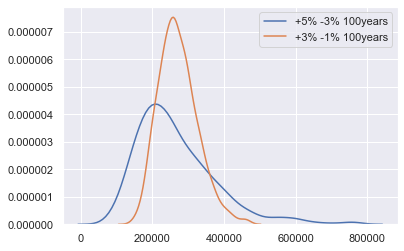

In [77]:
# Plot distribution
sns.kdeplot(results3, label='+5% -3% 100years')
sns_plot_100y = sns.kdeplot(results4, label='+3% -1% 100years')
sns_plot_100y = sns_plot_100y.get_figure()
sns_plot_100y.savefig('100y.png')

## Mean of the 2 Funds performance, along the years

In [82]:
def mean_along_years(nb_years, wl):
    """Return the mean per nb of years"""
    year_range = np.arange(nb_years)
    mean_per_year = []
    for year in year_range:
        distrib = run_simu(start_cap=start_cap, nb_experiment=nb_experiment,\
                       wl=wl, nb_years=year)
        mean_per_year.append(np.mean(distrib))
    mean_per_year
    return mean_per_year

In [91]:
start_time = time.time()
mean_per_year_5_3 = mean_along_years(100, [0.05, -0.03])
print(f'Data processing time: {time.time() - start_time}')

Data processing time: 45.47269320487976


In [92]:
start_time = time.time()
mean_per_year_3_1 = mean_along_years(100, [0.03, -0.01])
print(f'Data processing time: {time.time() - start_time}')

Data processing time: 47.30816411972046


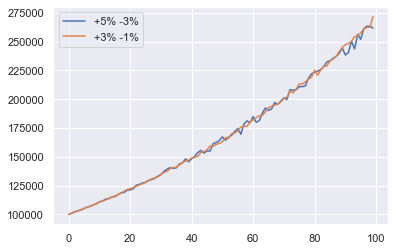

In [93]:
sns.lineplot(x=np.arange(100), y=mean_per_year_5_3, label='+5% -3%')
sns_mean_plot = sns.lineplot(x=np.arange(100), y=mean_per_year_3_1, label='+3% -1%')
sns_mean_fig = sns_mean_plot.get_figure()
sns_mean_fig.savefig('mean_along_years.png')